In [ ]:
# Duota prekių pirkimo duomenų rinkinys, kuriame kiekvienas vartotojas yra nurodytas su jo pirkimo istorija (pavyzdžiui, pirkimo suma, pirkimo dažnis, kategorija, pirkimo data ir kt.). Užduotis yra suskirstyti vartotojus į klasterius pagal jų pirkimo elgesį.

# Duomenų pavyzdys:

# Vartotojas 1: {suma: 100€, dažnis: 3 kartai per mėn., kategorija: elektronika, data: 2023-01-15}
# Vartotojas 2: {suma: 50€, dažnis: 1 kartą per savaitę, kategorija: maistas, data: 2023-01-20}
# Vartotojas 3: {suma: 200€, dažnis: 2 kartus per mėn., kategorija: drabužiai, data: 2023-02-10}
# ir tt.
# Galimi sprendimo variantai:

# Naudojant hierarchinį klasterizavimą, vartotojai gali būti suskirstyti į klasterius pagal jų pirkimo elgesį ir panašumus.
# Atlikus klasterizavimą, galima analizuoti kiekvieno klasterio charakteristikas ir nustatyti, kokio tipo klientai dominuoja kiekviename klasteryje.

# P.S. duomenų susikūrimui galite naudoti make_blobs(), kurią importuosite iš sklearn.datasets arba tiesiog aprasykite ranka

In [55]:
# susikuriame duomenų failą Data1.csv
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

np.random.seed(0) #padaro, kad vykdanr kodą nesikeistų reikšmės
vartotojai = range(1, 51)
sumos = np.random.randint(10, 200, 50)
dazniai = np.random.randint(1, 10, 50)
kategorijos = np.random.choice(['elektronika', 'maistas', 'drabuziai','kosmetika'], 50)
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
random_dates = []
for _ in range(50):
    random_date = start_date + timedelta(days=np.random.randint((end_date - start_date).days))
    random_dates.append(random_date)

data = {'vartotojas':vartotojai, 'suma':sumos,'daznis':dazniai,'kategorija':kategorijos, 'data':random_dates}
df = pd.DataFrame(data)
df.to_csv('Data1.csv', index=False)

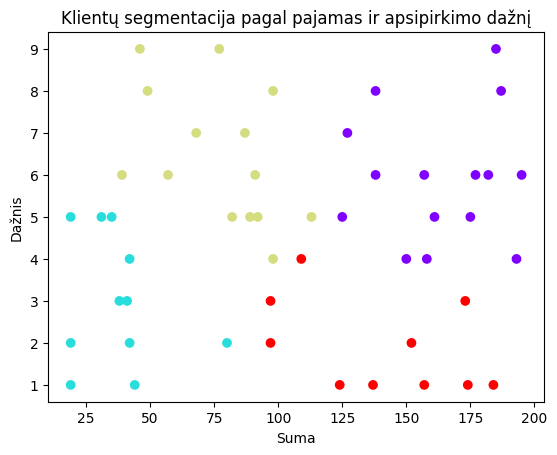

In [57]:
# Mindaugo variantas
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = pd.read_csv('Data1.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['suma','daznis']])

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(customer_data['suma'], customer_data['daznis'], c=clusters, cmap='rainbow')
plt.xlabel('Suma')
plt.ylabel('Dažnis')
plt.title('Klientų segmentacija pagal pajamas ir apsipirkimo dažnį')
plt.show()